**MNIST Handwritten number with logistic regression**

In [14]:
#Download dataset
!wget http://www.innovacademy.com/my_resources/subsample-mnist-hog.npy
!wget http://www.innovacademy.com/my_resources/util_data_load.py

--2022-02-21 13:47:28--  http://www.innovacademy.com/my_resources/subsample-mnist-hog.npy
Resolving www.innovacademy.com (www.innovacademy.com)... 108.167.158.160
Connecting to www.innovacademy.com (www.innovacademy.com)|108.167.158.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47330420 (45M)
Saving to: ‘subsample-mnist-hog.npy.1’

subsample-mnist-hog 100%[===================>]  45.14M  7.38MB/s    in 7.9s    

2022-02-21 13:47:36 (5.72 MB/s) - ‘subsample-mnist-hog.npy.1’ saved [47330420/47330420]

--2022-02-21 13:47:36--  http://www.innovacademy.com/my_resources/util_data_load.py
Resolving www.innovacademy.com (www.innovacademy.com)... 108.167.158.160
Connecting to www.innovacademy.com (www.innovacademy.com)|108.167.158.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4439 (4.3K)
Saving to: ‘util_data_load.py.1’

util_data_load.py.1 100%[===================>]   4.33K  --.-KB/s    in 0s      

2022-02-21 13:47:36 (326 MB/s) - ‘

In [15]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import util_data_load as util
from sklearn.metrics import accuracy_score

In [16]:
#Load parameters
parameters_file = "subsample-mnist-hog.npy"
parameters = np.load(parameters_file, allow_pickle=True).item()

In [17]:
#Define Softmax
def softmax(z):
  result = np.exp(z)
  sum = np.expand_dims(np.sum(result, axis=1), 1)
  return result / sum

In [18]:
#Define hypothesis function
def hypothesis(X, w):
  return softmax(X @ w)

In [19]:
#Define prediction function
def predict(X, w):
  return np.argmax(hypothesis(X, w), axis=1)

In [20]:
#Define loss function to determinde the cross-entropy value
def loss_function(y, y_hat, lam, w):
  N = y_hat.shape[0]
  error = -(1/N) * (np.sum(y * np.log(y_hat)) + lam * np.sum(w ** 2))
  return error

In [29]:
#Define the train function to find the parameters
def train():
  X = parameters["X_train"]
  y = parameters["y_train"]
  w = np.zeros((X.shape[1], 10))

  y_p = np.zeros((X.shape[0], 10))
  y_p[np.arange(X.shape[0]), y] = 1.0

  eta = 0.08
  N = X.shape[0]
  n_iteration = 5000
  lam = 0.2

  error_x = np.arange(0, n_iteration)
  error_y = np.zeros((n_iteration))

  m = eta / N

  for iteration in range(n_iteration):
    y_hat = hypothesis(X, w)
    w = w - m * (np.dot(X.T, y_hat - y_p))

    error_y[iteration] = loss_function(y_p, y_hat, lam, w)

    if (iteration + 1) % 100 == 0:
      print("Cross-entropy on iteration " + str(iteration + 1) + ": " + str(error_y[iteration]))
    
  plt.title("Loss function")
  plt.plot(error_x, error_y)
  plt.show()

  parameters["w"] = w

In [22]:
#This function allow us to recognize numbers according to the index of the entry in the dataset
def say_number(idx):
    w = parameters["w"]
    test_digits = parameters["test_data"]
    X_test = parameters["X_test"]
    width = parameters["width"]
    height = parameters["height"]
    
    plt.matshow(np.reshape(test_digits[idx], newshape = (width, height)), cmap='gray')
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.title("Prediction: The number is " + str(predict(np.reshape(X_test[idx], newshape = (1, X_test.shape[1])), w)[0]))

In [23]:
#Test fucntion
def evaluate():
  X_train = parameters["X_train"]
  y_train = parameters["y_train"]
  X_test = parameters["X_test"]
  y_test = parameters["y_test"]
  w = parameters["w"]

  y = predict(X_train, w)

  print("Training accuracy: " + str(accuracy_score(y_train, y)))

  y_pred = predict(X_test, w)
  print("Testing accuracy: " + str(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


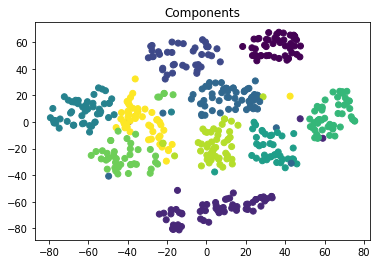

In [24]:
util.prepare_data(parameters, True)
util.plot(parameters, 500)

Cross-entropy on iteration 100: 0.14457738738623713
Cross-entropy on iteration 200: 0.10311403960879642
Cross-entropy on iteration 300: 0.08381488222486748
Cross-entropy on iteration 400: 0.07179384529336653
Cross-entropy on iteration 500: 0.06329548548786189
Cross-entropy on iteration 600: 0.05683606121463708
Cross-entropy on iteration 700: 0.05169085782757661
Cross-entropy on iteration 800: 0.04745622820871772
Cross-entropy on iteration 900: 0.043886353433199986
Cross-entropy on iteration 1000: 0.04082156325597023
Cross-entropy on iteration 1100: 0.03815282018667593
Cross-entropy on iteration 1200: 0.03580255152197705
Cross-entropy on iteration 1300: 0.03371364335003065
Cross-entropy on iteration 1400: 0.03184281146551275
Cross-entropy on iteration 1500: 0.030156447096768534
Cross-entropy on iteration 1600: 0.028627918777115857
Cross-entropy on iteration 1700: 0.02723575925376687
Cross-entropy on iteration 1800: 0.02596240740245386
Cross-entropy on iteration 1900: 0.0247933101821229


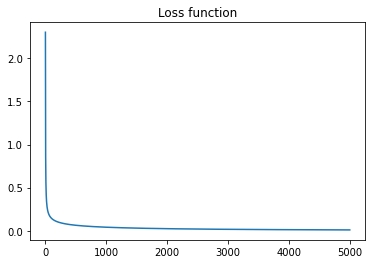

Training accuracy: 1.0
Testing accuracy: 0.9803333333333333


In [30]:
#Train and test
train()
evaluate()

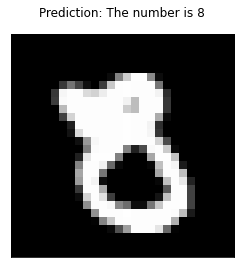

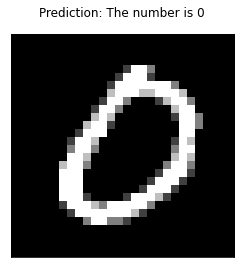

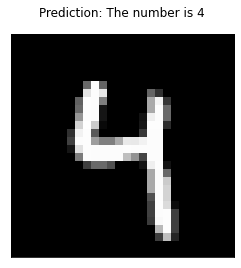

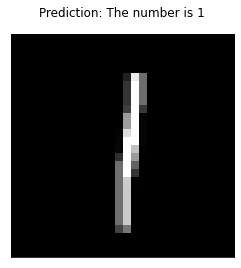

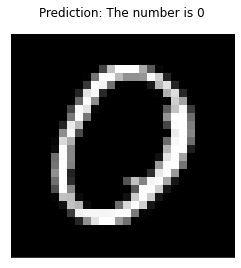

In [31]:
#Select randomly images to test the model
test_pool = np.random.randint(0, parameters["X_test"].shape[0], 5)
for i in test_pool:
  say_number(i)

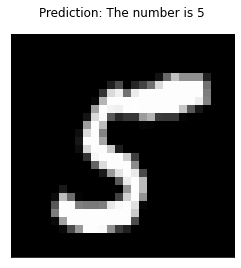

In [32]:
#Try images to test from 0 to 5999
say_number(3500)

**Logistic Regression with SKLearn**

In [33]:
#Import Library
from sklearn.linear_model import LogisticRegression

In [35]:
#Split into train and test
X_train, X_test, y_train, y_test = parameters['X_train'], parameters['X_test'], parameters['y_train'], parameters['y_test']

In [36]:
#Train the model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
#Make predictions
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9801666666666666